Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

%matplotlib inline 
sns.set(style="ticks")

In [0]:
url = 'https://raw.githubusercontent.com/Smet1/bmstu_ml/master/lab4/data.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [218]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [219]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 4600 строк и 18 столбца.


## Обработка пропусков в данных

In [0]:
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df[col].dtype
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

In [221]:
for col in df.columns:
    column_type = df[col].dtype
    print('{} - тип: {}'.format(col, column_type))

date - тип: object
price - тип: float64
bedrooms - тип: float64
bathrooms - тип: float64
sqft_living - тип: int64
sqft_lot - тип: int64
floors - тип: float64
waterfront - тип: int64
view - тип: int64
condition - тип: int64
sqft_above - тип: int64
sqft_basement - тип: int64
yr_built - тип: int64
yr_renovated - тип: int64
street - тип: object
city - тип: object
statezip - тип: object
country - тип: object


Удаление или заполнение пропусков, не требуется, так как в датасете отсутствуют пустые значения

## Кодирование категориальных признаков

In [222]:
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

date
street
city
statezip
country


In [223]:
print(len(df['date'].unique()))
print(len(df['street'].unique()))
print(len(df['city'].unique()))
print(len(df['statezip'].unique()))
print(len(df['country'].unique()))

70
4525
44
77
1


In [0]:
# кодируем
leDate = LabelEncoder()
df['date'] = leDate.fit_transform(df['date'])

leStreet = LabelEncoder()
df['street'] = leStreet.fit_transform(df['street'])

leCity = LabelEncoder()
df['city'] = leCity.fit_transform(df['city'])

leStatezip = LabelEncoder()
df['statezip'] = leStatezip.fit_transform(df['statezip'])

leCountry = LabelEncoder()
df['country'] = leCountry.fit_transform(df['country'])

In [0]:
# проверяем остались ли признаки
for col in df.columns:
    column_type = df[col].dtype
    if column_type == 'object':
        print(col)

In [0]:
from sklearn.model_selection import train_test_split

df_x = df.loc[:, df.columns != 'price']
df_y = df['price']

train_x_df, test_x_df, train_y_df, test_y_df = train_test_split(df_x, df_y, test_size=0.3, random_state=1)

In [227]:
row_number_train = train_x_df.shape[0]
column_number_train = train_x_df.shape[1]

print('Тренировочный датасет содержит {} строки и {} столбцов.'.format(row_number_train, column_number_train))

Тренировочный датасет содержит 3220 строки и 17 столбцов.


In [228]:
row_number_test = test_x_df.shape[0]
column_number_test = test_x_df.shape[1]

print('Тестовый датасет содержит {} строки и {} столбцов.'.format(row_number_test, column_number_test))

Тестовый датасет содержит 1380 строки и 17 столбцов.


In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error, r2_score

In [0]:
# функция, которая считает метрики построенной модели
def test_model(model):
    print('mean_absolute_error: {}'.format(round(mean_absolute_error(test_y_df, model.predict(test_x_df)), 2)))
    print('median_absolute_error: {}'.format(round(median_absolute_error(test_y_df, model.predict(test_x_df)), 2)))
    print('r2_score: {}'.format(round(r2_score(test_y_df, model.predict(test_x_df)), 2)))

## Обучение моделей

### Случайный лес 

In [231]:
from sklearn.ensemble import RandomForestRegressor

ran_80 = RandomForestRegressor(n_estimators=80)
ran_80.fit(train_x_df, train_y_df)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [232]:
test_model(ran_80)

mean_absolute_error: 141408.66
median_absolute_error: 72183.5
r2_score: 0.26


### Градиентный бустинг

In [233]:
from sklearn.ensemble import GradientBoostingRegressor

gr_80 = GradientBoostingRegressor(n_estimators=80)
gr_80.fit(train_x_df, train_y_df)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [234]:
test_model(gr_80)

mean_absolute_error: 150195.9
median_absolute_error: 90637.71
r2_score: -0.17


## Подбор гиперпараметра n

### Случайный лес

In [235]:
param_range = np.arange(50, 170, 10)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160])}]

In [236]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(df_x, df_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                     

In [0]:
reg = gs.best_estimator_

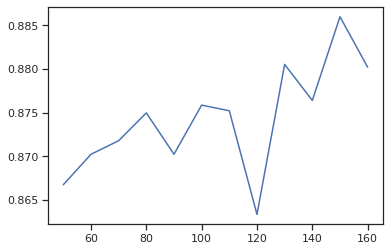

In [238]:
import matplotlib.pyplot as plt

plt.plot(param_range, gs.cv_results_["mean_train_score"]);

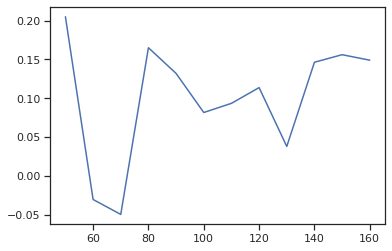

In [239]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [240]:
reg.fit(train_x_df, train_y_df)
test_model(reg)

mean_absolute_error: 137878.87
median_absolute_error: 67215.46
r2_score: 0.38


### Градиентный бустинг

In [241]:
gs = GridSearchCV(GradientBoostingRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(df_x, df_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 m...
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                

In [0]:
reg = gs.best_estimator_

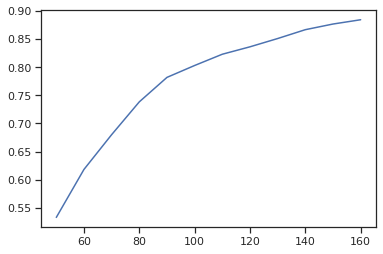

In [243]:
plt.plot(param_range, gs.cv_results_["mean_train_score"]);

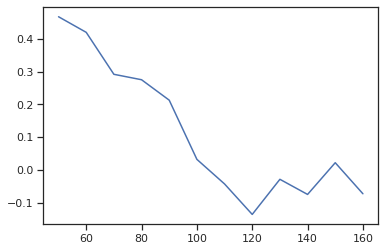

In [244]:
plt.plot(param_range, gs.cv_results_["mean_test_score"]);

In [245]:
reg.fit(train_x_df, train_y_df)
test_model(reg)

mean_absolute_error: 155786.09
median_absolute_error: 96889.94
r2_score: 0.2
